# Introductory statistics tutorial: random variables and distributions

Machine Learning and Statistics go hand-in-hand.  In this tutorial, we will explore some introductory statistical concepts to make sure that you are confident with the fundamentals.  If you are new to Statistics, this tutorial should quickly catch you up.  If you think your Statistics is ninja-level, all the more reason to go back to the basics to prove it!  

These foundations will quickly become practical... look out for them when we introduce **CINDY** - the Explore Data Mining Methodology.

Start by importing the libraries we'll need for this tutorial.

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

## Overview

We're going to start by explaining the concept of a random variable, and distinguishing between two types: **discrete** and **continuous**. Then we'll move onto functions which describe the probability distributions of those random variables, i.e. that describe how likely particular outcomes are.


Armed with that foundation, we'll be able to look at six of the most important probability distributions: the binomial, Poisson, negative binomial, normal, exponential and uniform distributions. We'll also investigate the logistic function, which is an important foundation for some of the data science work we'll get to a few weeks from now. 

Then we'll have a look at some of the key measures of central tendency and variability for distributions, populations and samples: the mean, median, variance, standard deviation and coefficient of variation. We'll distinguish between the population and sample mean and variance, look at sampling distributions and briefly refresh our memory about the Central Limit Theorem, which we first encountered in the Peter Norvig tutorial on probability. We'll finish the statistics theory for this section by understanding the normal approximation to the binomial and Poisson distributions.

Through all of this, we'll be using some basic ```matplotlib``` to visualise the distributions.


So what are we waiting for? Let's get started!


## Random variables

When we looked at set and probability theory, we defined the concept of the sample space $S$ as the set of all possible events; we can think of this as representing all of the possible outcomes of an experiment whose outcome is unknown at the outset. For example, getting dressed in the morning we reach blindly into the drawer to pull out a pair of socks, knowing that there are white, black and blue socks in there.

We can think of this as an experiment: we know what all the possible outcomes are, and if we know something about how many pairs of each colour sock we own, we also know something about the probabilities of those outcomes. But we don't know the actual outcome until we pull our hand back out and examine the pair of socks it's clutching.

We can define a variable $X$ to stand for the values of the possible outomes. This $X$ is what we define as a **random variable**: one which can take on a range of possible values and whose actual value is unknown until completion of the experiment.

Other classic examples include the tossing of a coin or the rolling of a die.

### Discrete random variables

Discrete random variables can only take on specific values. Our sock, coin and die examples above are all discrete: the possibilities are {white, black,blue}, {heads, tails} and {1, 2, 3, 4, 5, 6} respectively.

Usually, we'll be looking at problems where the outcomes are real numbers, as in the die example. Where they're not, as in the coin example, we would usually proceed by assigning a numeric value to each of the possible outcomes, e.g. 1 for heads and 2 for tails. Most common discrete random variables take on integer values, but that's not necessarily the case: if there are either 2 or 3 people coming to share a pizza with me, and we share equally, then the possible outcomes for me are one-quarter and one-third of a pizza.

**Test your understanding**: which of the following are discrete random variables? (The answers are at the end, but don't go there until you've tested yourself!)
    
* the number of goals that will be scored by Orlando Pirates next weekend

* the number of letters in the alphabet

* the number of students who pitch up to next Monday's briefing

* the 400m world record time in 2050

## Continuous random variables

If you gave a little thought to that last question, you might have found it a little tricky. You might well have questioned whether this is a discrete random variable, and you'd have been right to do so. It clearly fits the general concept of a random variable: the outcome is uncertain, and we should be able to talk probabilistically about it, e.g. "what is the probability that the 400m world record time in 2050 will be below 42 seconds".

We could consider it as a discrete random variable if we considered the outcomes to be the possible times measured to the nearest hundredth of a second, as they usually are. But time can in principle be measured to any degree of accuracy: 42.9725 seconds is not the same as 42.9725346534 seconds, which is in turn different to 42.9725346534342354261498 seconds. Between any two arbitrary times we could choose, there is another time which fits between them, and this process can continue into infinity. Random variables that can be measured to arbitrary precision in this way are known as continuous, and distinguished from discrete random variables which can only take on a discrete range of possible values. 

## Probability mass and probability density functions

We need some mathematical language to describe the probabilities of the various possible outcomes of random variables (what we refer to as **probability distributions**). Random variables have functions which map their outcomes onto their corresponding probabilities. These are most easily described in the case of discrete random variables, whose **probability mass functions** $p(x)$ directly map a given outcome $x$ onto the probability of $x$ being observed in a given trial.

There are three conditions which a probability mass function (PMF) must fulfil:

1. $p(x)$ is defined for all $x$, but $p(x)>0$ only for a finite set of points. (Or countably infinite set of points, but that's a subtlety we can happily ignore at at this stage.)

2. $0 \le p(x) \le 1$ for all $x$. Intuitively, the bounds on a probability are 0 for an outcome that can never be observed and 1 for a certain outcome.

3. $\displaystyle \sum_x p(x) = 1$. Observing one of the range of all possible outcomes is certain, and hence probabilities must sum to 1.

Consider the coin toss, coding heads as 1 and tails as 2. We have that $p(1) = p(2) = 0.5$ and $p(x) = 0$ for all $x \neq 1,2$, hence all three conditions hold and the probability mass function for the coin toss is a valid PMF.


Continuous random variables are a little more tricky, conceptually. For discrete variables, the probability mass function tells us directly the probability of individual outcomes, or (by summing) of groups of outcomes. For example, the PMF for the roll of a die is $p(x) = 1/6$ for $x \in 1, 2, 3, 4, 5, 6$. We can see directly that there is a one-in-six chance of rolling a three, or a 50% chance $(1/6 + 1/6 + 1/6)$ of rolling a four or above. But for continuous random variables, the probability of achieving a very specific outcome is in fact zero. This sounds a little counter-intuitive, I know, but it has to do with the infinite divisibility of outcomes. Therefore, for a continuous random variable we must think in terms of the probabiity of achieving an outcome between two limits. For example, for the 400m world record, we could think of the probability of Wayde van Niekerk running another 43.03 second race, rounded to the nearest hundredth of a second, as the probability of a time between 43.025 and 43.035 seconds.

We therefore can't directly define a probability mass function for continuous random variables; instead, we define what is known as a **probability density function** (PDF). There are also three conditions for PDFs which are conventionally written as $f(x)$:

1. $f(x)$ must be defined for all values of $x$.

2. All values of $f(x)$ are non-negative (note there is no upper bound on this, unlike $p(x)$ for a discrete random variable).

3. Finally, $\displaystyle \int_{-\infty}^{\infty} f(x) dx = 1$.

The last condition is the equivalent of the requirement that all probability masses sum to 1 for a discrete random variable. Probabilities for continuous variables are found by integration, which is after all the continuous analogue to summation, and this condition enforces that the integral of the probability densities over all possible values of $x$ comes to 1, as necessary for a valid probability distribution. To continue with our 400m example, we would evaluate the probability we're after by integrating between 43.025 and 43.035 seconds. We'd find the probability of Wayde breaking his own world record by integrating over the interval 0 (or negative infinity, but negative times are of course not possible so we can safely ignore this part of the real number line) to 43.025 seconds.

## Cumulative distribution functions

Cumulative distribution functions (CDFs, or just distribution functions), usually denoted $F(x)$, give the probability that a random variable $X$ takes on a value less than or equal to some given value $x$. In other words, $$F(x) = P(X \le x).$$

Before you read further, see if you can figure out how $F(x)$ would be defined for a discrete and a continuous random variable respectively.

/----------

/

/

/

/

/


This blank space is sponsored by BCX, in the interests of stretching your mind.


/

/

/

/

/


---------------/














That's right: for a discrete variable it would be 

$$F(x) = \sum_{t \le x} p(t),$$ 

and for a continuous random variable we would define the distribution function as 

$$F(x) = \int_{-\infty}^x f(t) \: dt.$$


(You got that, right?)

This is a good opportunity to take a breather, and make sure you've clearly understood everything so far, before we move on and dive into some important probability distributions that you'll see many times on your data science travels. If there are aspects of the discussion so far that are in any way vague or unclear, follow the three-step process below to resolving your questions (this will apply throughout your studies, so get used to it now):

1. Try to figure it out yourself. You won't get far in data science if you run for help every time there's something that you don't quite understand; train yourself to have the determination to do everything possible to unravel things in your own brain.

2. When your forehead starts to bleed and it's still unclear, have a chat to your project team members or classmates; perhaps one of them can explain it to you in a way that makes sense.

3. If both of those avenues fail, use consultation time or make an appointment to see a lecturer, and have him or her explain it to you carefully.

## Some important probability distributions

With that background in mind, we can now start to look at some of the most common probability distributions, all of which have applications in data science. We'll look at the following discrete distributions:

1. Binomial

2. Poisson

3. Negative binomial


And also the following continuous distributions:

1. Normal

2. Exponential

3. Uniform



### Binomial distribution

A binomial process is a series of independent trials of an experiment with two possible outcomes; a series of coin tosses is a good example. It's easy to figure out the probability of one coin toss landing on heads; it requires a little more insight (but is still easy enough) to figure out the probability of two tails on two consecutive tosses; but it's not nearly so straightforward to figure out the probability of thirty heads and twenty tails when we toss the coin fifty times.

Let the random variable $X$ be the number of a particular outcome in a binomial process with $n$ independent trials where $p$ is the probability of the outcome in question for any individual trial. Then $X$ has the binomial distribution, whose PMF is given by

\begin{align}
p(x) & = \binom{n}{x} \: p^x \: (1-p)^{n-x} & & \text{for } x = 0, 1, \ldots, n\\
     & = 0 & & \text{otherwise}
\end{align}

It isn't hard to see how this is derived. With $n$ trials, there are $2^n$ possible specific outcomes for the trial. For example, if $n=3$ and we're tossing a coin, so $p=0.5$, the possible outcomes are (with Heads denoted H and Tails denoted T):

H, H, H

H, H, T

H, T, H

H, T, T

T, H, H

T, H, T

T, T, H

T, T, T

Because $p = 0.5 = (1-p)$, each of those outcomes has probability $0.5^3 = 0.125$. But with our random variable $X$, we're not interested in the specific ordering of the outcomes, but only in how many of a particular outcome were observed. Only one outcome delivers three heads, and only one delivers zero heads. But for two heads and one head respectively, we can see that there are three possibilities. The sharp among you will have realised that this is just an examble of the combination logic we learned about in the probability module: there is $\binom{3}{3} = 1$ outcome with three heads, $\binom{3}{2} = 3$ outcomes with two heads, and so on; or, in general, $\binom{3}{x}$ outcomes with $x$ heads. The binomial distribution PMF above is simply the generalisation of this logic to any $n$, $x$ and $p$.

Let's plot the PMF for 10 trials, where $p$ is alternately 0.1 and 0.5.

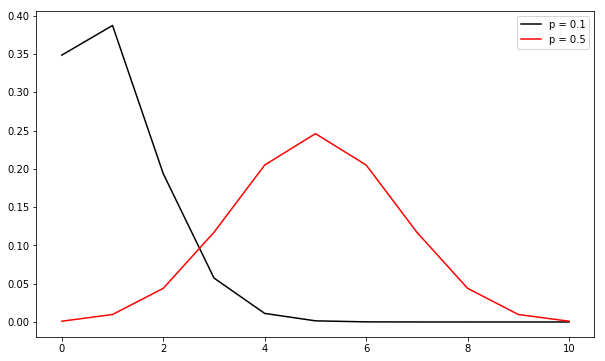

In [2]:
n = 10
x = np.arange(0,11)
p1 = 0.1
px1 = st.binom.pmf(x, n, p1)
p2 = 0.5
px2 = st.binom.pmf(x, n, p2)

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x, px1, 'k', label = 'p = 0.1')
plt.plot(x, px2, 'r', label = 'p = 0.5')
plt.legend()
plt.show()

### Poisson distribution

Suppose that there is some event that is equally likely to occur at any point in time, say your lecturer popping his head over your shoulder to check that you're working on your introductory statistics tutorial instead of looking at pictures of otters on Facebook. Let the random variable $X$ be equal to the number of occurrences of this event in a given period of time, where we use the fixed parameter $\lambda$ to represent the rate at which events occur per time period. The notation $X \sim P(\lambda)$ (that symbol $\sim$ is read "is distributed") signifies that $X$ follows the Poisson distribution with parameter $\lambda$, which has PMF as follows:

\begin{align}
p(x) & = \displaystyle \frac{e^{-\lambda} \lambda^x}{x!} & & \text{for } x = 0, 1, 2, \ldots\\
     & = 0 & & \text{otherwise}
\end{align}

Suppose that your lecturer appearing unexpectedly occurs at the rate of 0.3 per hour, which is a rate of 2.4 per 8-hour day. Let's plot the PMF of the number of lecturer appearances expected in a workday:

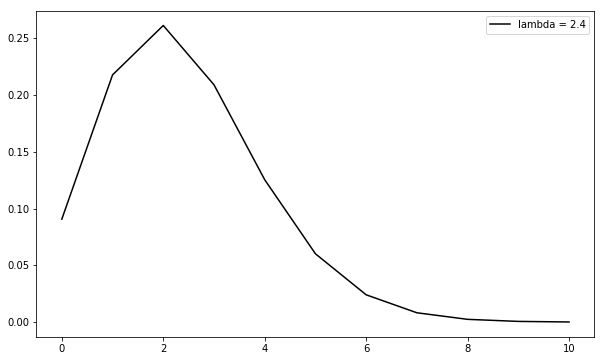

In [3]:
poisson_lambda = 2.4
x = np.arange(0,11)
px = st.poisson.pmf(x, poisson_lambda)

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x, px, 'k', label = 'lambda = 2.4')
plt.legend()
plt.show()

### Negative binomial distribution

Suppose once again that we have a binomial process, where each trial is either a success or a failure. If we let $X$ represent the number of failures that occur before we hit a specific number of successes, usually denoted $r$, and $p$ is the probability of success on each trial, then $X \sim NB(r,p)$, i.e. $X$ follows the negative binomial distribution with parameters $r$ and $p$ and has PMF:

\begin{align}
p(x) & = \binom{x+r-1}{x} p^r (1-p)^{x} & & \text{for } x = 0, 1, \ldots, n\\
     & = 0 & & \text{otherwise}
\end{align}

You can derive this PMF in a similar way to the approach we took for the binomial distribution. Intuitively, each possible path that takes us to $r$ successes and $x$ failures must have probability $p^r (1-p)^x$. How many such combinations are there? Well, remember first of all that by our definition, the last trial must have been a success, so in the previous $x+r-1$ trials we will have had $x$ failures. There are $\binom{x+r-1}{x}$ ways of arranging these
$x$ failures and $r-1$ successes.

Let's plot the PMF for $p = 0.3$ and $r$ equal to either 2 or 3.


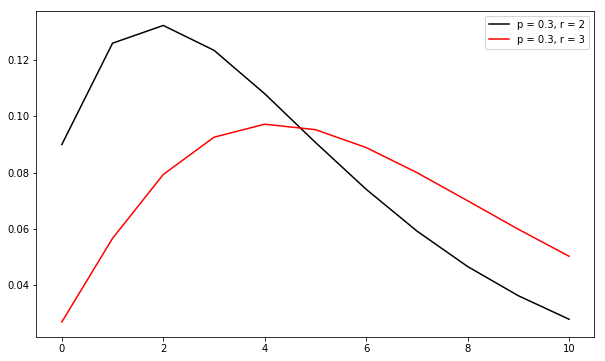

In [4]:
p = 0.3
x = np.arange(0,11)
r1 = 2
px1 = st.nbinom.pmf(x, r1, p)
r2 = 3
px2 = st.nbinom.pmf(x, r2, p)

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x, px1, 'k', label = 'p = 0.3, r = 2')
plt.plot(x, px2, 'r', label = 'p = 0.3, r = 3')
plt.legend()
plt.show()

### Normal distribution

The normal, or Gaussian, distribution is hugely important in statistical and data science work (although it has its limitations!)- one of its primary applications is in what's known as the Central Limit Theorem, which we'll refresh our memories about a little later. So it's worth spending a little time to understand it thoroughly.

A normally distributed variable is continuous, and has PDF:

$$ f(x) = \displaystyle \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right) ^2} $$

for $x$ taking on any value on the real number line.

You'll immediately have seen (won't you?) that the normal distribution has two parameters, $\mu$ and $\sigma$. These in fact are the mean and standard deviation of the distribution respectively; some of you will already be familiar with these concepts but for those who aren't, don't let it bother you just yet: we'll be explaining those in a little while.

An important practical application is the **standard normal distribution**, which has $\mu =0$ and $\sigma = 1$, and hence PDF:

$$ \phi(x) = \displaystyle \frac{1}{\sqrt{2 \pi}} e^{-\frac{1}{2} x^2} $$

The normal distribution is bell-shaped: let's write a little Python code to illustrate that using ```matplotlib```. This time, just for fun, we'll evaluate the density directly from the above equation, rather than using the built-in ```scipy``` functions. But you can easily verify that you get the same results from the latter.

In [5]:
x = np.arange(-5,5,0.01)     # range of values for z
mu = 0                       # mu = 0 for standard normal
sigma = 1                    # mu = 1 for standard normal

# now calculate f(x)
f = 1 / np.sqrt ((2 * np.pi * sigma ** 2)) * np.exp (-0.5 * ((x - mu) / sigma) ** 2)

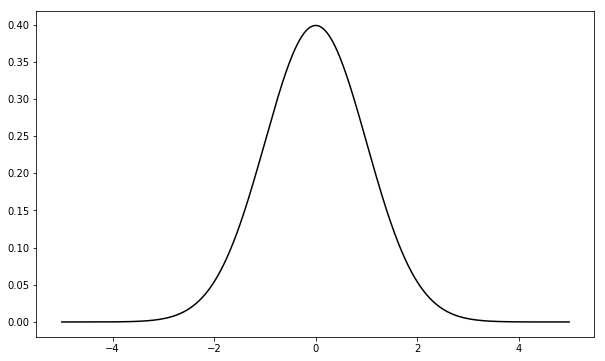

In [6]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x,f,'k')
plt.show()

Why don't you mess about with the parameter values?

What happens if you change the value of `sigma` to 0.5? And to 2?

And what about if you leave `sigma` at 1 but change `mu` to 5?

Oops. Why did that happen? What would you need to do to show the bell shape we'd like to see?


Notation-wise, if $X$ is normally distributed with mean $\mu$ and standard deviation $\sigma$, then we denote this as $X \sim N(\mu, \sigma^2)$. Note that the second parameter is by convention shown as $\sigma^2$ rather than $\sigma$ - you may recognise this as the variance of the distribution, but if not, don't worry, we're getting there soon!

Remember that for continuous random variables, in order to calculate the probability of an outcome in a particular range, we need to use the cumulative distribution function. As we've seen above, this requires integrating the PDF. Unfortunately, there are no analytical solutions to this, but numerical methods can be used (don't worry if the mathematics of numerical integration are outside your range of expertise, as this is beyond our scope at this point; if you're interested, you can get a high-level overview at https://en.wikipedia.org/wiki/Numerical_integration). This has been encoded in handy tables with which you'll no doubt be familiar if you've done any university-level statistics, and of course Python and ```scipy''' provide functions for us to evaluate. Let's define a function to calculate the probability of an observation following the above distribution lying between arbitrary bounds $x_1$ and $x_2$, and then use that to calculate the probability of an observation between 2 and 5. We use the simple logic here that the probability we're after is the probability of an observation of less than $x_2$, less the probability of an observation less than $x_1$.

In [7]:
def normal_prob (x1, x2, mu, sigma):
    return (st.norm.cdf (x2, mu, sigma) - st.norm.cdf (x1, mu, sigma))

normal_prob(2, 5, mu, sigma)

0.022749845296607285

### Exponential distribution

The exponential distribution is related to the Poisson process which underlies the Poisson distribution (a Poisson process is simply one in which events occur at the rate of $\lambda$ per time period). Here, instead of modelling the number of events in a time period, as we did with the Poisson, we are interested in the time interval between events. Unlike the Poisson distribution, therefore, this is a continuous random variable. With $\lambda$ defined as before, then the PDF for $X \sim E(\lambda)$ measuring the time between events is:

\begin{align}
f(x) & = \lambda e^{-\lambda x}  & & \text{for } x \ge 0 \\
     & = 0 & & \text{otherwise}
\end{align}

Let's go back to our 'lecturer wandering in' example, where $\lambda = 0.3$ per hour. And then let's plot the probability density of the time interval between consecutive lecturer appearances:

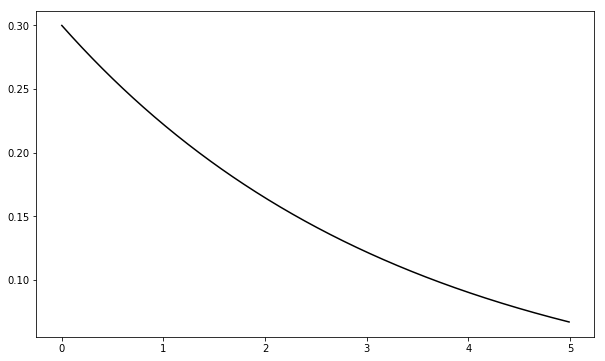

In [8]:
poisson_lambda = 0.3
x = np.arange(0,5,0.01)
dx = st.expon.pdf(x, scale = 1/poisson_lambda)

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x, dx, 'k')
plt.show()

Let's calculate the probability of a time interval of less than half an hour between consecutive lecturer appearances:

In [9]:
st.expon.cdf(0.5, scale = 1/poisson_lambda)

0.1392920235749422

### Uniform distribution

As the name suggests, a uniformly distributed random variable will take on any value in a given interval with equal probability. The two key parameters are therefore the lower and upper points of the interval, usually denoted $a$ and $b$ respectively, and $X \sim U(a,b)$ has PDF:

\begin{align}
f(x) & = \displaystyle \frac{1}{b-a} & & \text{for } a \le x \le b \\
     & = 0 & & \text{otherwise}
\end{align}

A little integration will tell you that the probability of an observation between $c$ and $d$, where $a < c < d < b$, is equal to $\displaystyle \frac{c - d}{b - a}$, which should strike you as intuitively correct given that the essence of a uniform distribution is that every possible observation between the lower and upper bounds is equally likely. Let's test:

In [10]:
a = 0
b = 5
c = 2
d = 3

st.uniform.cdf(d, loc = a, scale =  b-a) - st.uniform.cdf(c, loc = a, scale = b-a)

0.19999999999999996

HA! Were you expecting exactly 2?  This is an example of python's [floating point precision](https://docs.python.org/3/tutorial/floatingpoint.html) limitations

### Breather

Good time for another breather. How are you doing with your understanding of the distributions? We've shown how one or two of them can be derived. If you're interested in doing the same for the others, feel free to do a little research: some intelligent Googling should give you all that you need. But for now we're focussing on the application of the distributions, so don't feel compelled to dig into the mathematical underpinnings unless you have both the time and the interest.

## The logistic function

Another really important function in data science work is the logistic function: it's the basis of the most fundamental of classification techniques, logistic regression, and has applications in a wide variety of machine learning and artificial intelligence techniques, including artificial neural networks.

The logistic function produces what is known as a sigmoid curve, an S-shaped curve which shows exponential growth initially, gradually tapering off and slowing significantly to the right. Its general formula is:


$$  f(x) = \displaystyle \frac{L}{1 + e^{-k(x - x_0)}},$$

where $L$ is the maximum value for $f(x)$, to which $f(x)$ tend asymptotically as $x$ increases, $k$ is a measure of steepness and $x_0$ is the mid-point of the sigmoid function. For most practical applications, we take $L=1, k=1$ and $x_0 = 0$. For this **standard logistic function**:

$$  f(x) = \displaystyle \frac{1}{1 + e^{-x}}.$$

Let's plot that below.

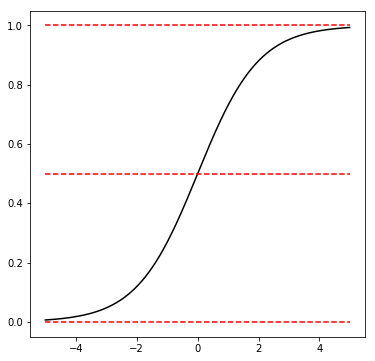

In [11]:
x = np.arange(-5,5,0.01)     # range of values for z
x0 = np.zeros(len(x))
x1 = np.ones(len(x))
x12 = x1/2

# now calculate f(x)
f = 1 / (1 + np.exp(-x))

plt.rcParams["figure.figsize"] = (6,6)
plt.plot(x,f,'k')
plt.plot(x,x0,'--r')
plt.plot(x,x12,'--r')
plt.plot(x,x1,'--r')
plt.show()


We will come back to Logistic Regression in detail in the second sprint. Logistic Regression is the most fundamental algorithm for classification problems.  Can you see why?  We can use it to model the probability that a certain outcome is true (e.g. is there a cat in this picture?)  If the logistic regression model predicts above a threshold (say 50% in the example above) then we think there is indeed a cat in the picture...

![cat_picture](https://github.com/Explore-AI/Pictures/blob/master/cat_detection.jpeg?raw=true)

## Sample statistics

There are various summary measures which we may use to tell us something about key features of a probability distribution, or, more practically, a sample of data. Some of the key features we'll be interested in are:

* measures of central tendency, telling us something about the most likely outcomes: mean and median are the two we'll cover now, and 

* measures of spread or variability in the data, under which heading we'll meet the concepts of variance and standard deviation, and the standardised coefficient of variation.

### Mean and median

The **mean** is the expected value of a distribution or the average of a sample; we'll see how these are related when we look at sampling distributions, but for now we'll unpack the concepts in the context of random variables with known distributions.

The mean of a discrete random variable is given by:

$$\mu_X = E(X) = \sum_x x \: p(x).$$

The $E(.)$ operator above is the expectations operator; $E(X)$ denotes the expected value of $X$. Let's consider this in the context of a process where we either take one step forward or stand still, with equal probability. What is the expected value of the number of steps we will have taken?

$$E(X) = 0 p(0) + 1 p(1) = 0 \times 0.5 + 1 \times 0.5 = 0.5.$$

So the expected value of the random variable denoting the number of steps taken is 0.5. That can be a little confusing, because 0.5 is not actually one of the possible outcomes: we will after either have taken 0 steps or 1 step. A useful way to think about is that the expected value, or mean, reflects the average number of steps we expect to have taken if we repeat the experiment an infinite, or at least very large, number of times. Thinking about it this way will help you understand better the sample mean and the Central Limit Theorem, when we get there.

For a continuous random variable, the mean is defined as:

$$\mu_X = E(X) = \int_{-\infty}^{\infty} x \: f(x) \: dx.$$

The **median** is the outcome which $X$ is as likely to be below as above, in other words it cuts the probability dirtibution in half with equal weight on either side. Denoting the median as $m$, it therefore satisfies the following for a continuous random variable:

$$P(X \le m) = P(X \ge m) = \int_{-\infty}^m x \: f(x) \: dx.$$

As a test of your understanding, write down the corresponding relationship for a discrete random variable.

### Variance and standard deviation

These two concepts are closely related: the standard deviation is the square root of the variance; these are the most common measures of variability in probability distributions. Variance is defined as follows for a discrete random variable:

$$\text{Var}(X) = \sigma_X^2 = \sum_x (x - \mu_X)^2 \: p(x),$$

and as follows for a continuous random variable:

$$\text{Var}(X) = \sigma_X^2 = \int_{-\infty}^{\infty} (x - \mu_X)^2 \: f(x) \: dx.$$


It may on occasion be easier to evaluate using an equivalent form, for discrete variables:

$$\sigma_X^2 = \left( \sum_x x^2 \: p(x) \right) - \mu_X^2 $$

and for continuous variables:

$$ \sigma_X^2 =  \int_{-\infty}^{\infty} x^2 f(x) \: dx - \mu_X^2.$$

Satisfy yourself that these are equivalent to the original forms presented above. Conceptually then, the variance measures $E(X^2) - [E(X)]^2$, and this is often a useful way to think about it when trying to calculate the variance of a distribution.

As noted above, the standard deviation is the square root of the variance, i.e. $\sigma = \sqrt{\text{Var}(X)}.$



### Coefficient of variation

The coefficient of variation standardises the standard deviation by the size of the mean, i.e. it is equal to $\displaystyle \frac{\mu_X}{\sigma_X}$. It is generally only a sensible measure if $X$ is non-negative. The intuition behind it is that if one distribution generally takes on higher values than another, as reflected in their respective means, then the most sensible means for comparing their variability is to express standard deviation as a multiple of the typical size represented by the mean. Its uses in sampling theory will be discussed later in the course.

## Population and sample mean and variance

These are all well and good, but in most practical data science work, we don't know what distribution gave rise to the data we're observing. We now need to distinguish between properties such as mean and variance relating to the population and those relating to a sample drawn from that population.

Suppose that we are interested in the salaries of data scientists across the globe (and why wouldn't we be??). It's an impossible task to know be sure of the distribution of these salaries; in practice, that would require information on the salary of each and every data scientist. We consequently end up relying on inferences made from a representative sample of data scientists. The true values of the population mean and variance are in principle unknowable. It's time now to introduce the concept of a sampling distribution, but first let's remind ourselves of a tool that will prove valuable in this quest: the Central Limit Theorem.

We can however calculate a sample mean and variance. The mean $\bar{x}$ is simply the average of the observations $x_t$, where $t = 1, 2, \ldots, n$:

$$\bar{x} = \displaystyle \frac{1}{n} \sum_{t=1}^n x_t.$$

The sample variance is calculated as:

$$s^2_X = \displaystyle \frac{1}{n-1} \sum_{t=1}^n (X_t - \bar{x})^2.$$

If you're paying attention, you may be asking why we divide by $n-1$ here, rather than $n$, as seems intuitive and as we did for the sample mean. While a little technical at this stage, this has to do with wanting an unbiased estimate of the population variance (in other words, if we repeated the sample a very large number of times and averaged the sample variances, we'd want that average to be equal to the population variance). Technically, we lose a degree of freedom here because we've had to use the sample mean $\bar{x}$ as our estimate of $\mu$: the sample mean together with $n-1$ of the observations determine the value of the $n$th observation; this is no longer a free parameter. If you don't get that, don't sweat it too much: what's important at this stage is that you know that if we want our sample variance to be unbiased, we must use a divisor of $n-1$ rather than $n$.



## Central Limit Theorem

You should remember from the probability tutorial the Central Limit Theorem, which states that if a random variable $X$ is the sum of a large number of independent, identically distibuted random outcomes, it will approximately follow a normal distribution, *even if the underlying random variables are not normally distributed*. Proof of this is beyond the scope of the course, but you should realise that this is an asymptotic result: it gets closer and closer to being true as the number of observations increases. As a general rule of thumb, 30 observations are required to rely on the Central Limit Theorem.

You may want to go back to Peter Norvig's probability tutorial to refresh your memory on this, if it's faded a little.

## Sampling distribution

Although they are unknowable, the population does have a fixed mean and variance, which we'll call $\mu$ and $\sigma^2$ respectively. It should also be clear that if we draw a sample at random from the population, and if that sample is both large enough and representative (e.g. we haven't inadvertently selected mostly junior data scientists in our sample), the mean of our sample, which we'll denote $\bar{x}$, should be somewhere in the vicinity of $\mu$, but will differ from sample to sample. So we have some information about how likelyan obervation of $\bar{c}$ is going to be, but we only know its true value once we've drawn the sample: well, that sounds like a random variable, doesn't it? We may in fact denote our (unknown in advance) sample mean as the random variable $\bar{X}$, and then we will want to understand something about its distribution (the probability distributions of sample statistics such as this are referred to as **sampling distributions**). 

Suppose we draw a sample of $n$ data scientist salaries, denoting each observation $x_t$, where $t = 1, 2, \ldots, n$.
Now we know that each individual $x_t \sim N(\mu, \sigma^2)$, even though we don't know the values of $\mu$ and $\sigma$. The sum of $n$ observations identically distributed in this way will have mean $n \mu$, and hence this sum divided by $n$ will have mean $\mu$. It can also be shown (though we won't here) that the variance of $\bar{X}$ is equal to $\frac{\sigma^2}{n}$. Furthermore, our friend the Central Limit Theorem says that provided that $n$ is large enough, the sampling distribution will be approximately normal (it will be precisely normal if the underlying observations are normally distributed). 

What can we infer from the above? Firstly, that our expectation of a sample mean is given by the population mean, which seems intuitive. Secondly, that the larger our sample, the more confident we are that it will be closer to the population mean, as the variance is an inverse function of $n$. This introduces the important concept of confidence intervals: bands within which we are confident (with some chosen degree of accuracy) our sample mean will fall.

## Confidence intervals

If a random variable is normally distributed, we can make statements about how certain we are that it will fall within certain multiples of the standard deviation about the mean. One well-known feature, with which you will become familiar, is that 95% of observations lie within 1.96 standard deviations of the mean. Let's get Python to confirm:

In [12]:
# show that roughly 95% of probability weight lies within 1.96 standard deviations§
print(st.norm.cdf(1.96) - st.norm.cdf(-1.96))      # 95% CI within 1.96 standard deviations
# calculate the exact CI band: since we want a 95% CI, we want 2.5% above the upper bound and 2.5% below the lower
# bound. Since the distribution is symmetric, we can simply figure out the point below which 97.5% of the 
# probability weight lies.
print(st.norm.ppf(0.975))

# repeat for 90%, 99% and 99.5% CIs
print(st.norm.ppf(0.95))
print(st.norm.ppf(0.995))
print(st.norm.ppf(0.9975))

0.950004209703559
1.959963984540054
1.6448536269514722
2.5758293035489004
2.807033768343811


How can we use this? Well, if we assume that the population variance $\sigma^2$ is known (an assumption which we'll relax in a later tutorial, when we cover hypothesis testing and the t-distribution), then we can say with 95% confidence that 

$$\displaystyle \mu - 1.96 \frac{\sigma}{\sqrt{n}} < \bar{X} < \mu + 1.96 \frac{\sigma}{\sqrt{n}}.$$

Just a little rearrangement should convince you that this is equivalent to saying that:

$$\displaystyle \bar{X} - 1.96 \frac{\sigma}{\sqrt{n}} < \mu < \bar{X} + 1.96 \frac{\sigma}{\sqrt{n}}.$$

For a 99% confidence interval, we'd substitute 2.58 for 1.96, but the principle remains the same for establishing confidence intervals around our estimate of the unknown population mean.

## Normal approximation to binomial and Poisson

While complicated, and beyond the scope of this course, to prove, it is a useful result that both the binomial and Poisson distributions may be approximated by the normal distribution when certain criteria are met.

The mean of the binomial distribution is $np$ and its variance is $np (1-p)$, so a $X \sim B(n,p)$ may be approximated by $X \sim N(np, np(1-p)$ when $np > 5$ and $n(1-p) > 5$.

Similarly, $X \sim P(\lambda)$ may be approximated by $X \sim N(\lambda, \lambda)$, since $\lambda$ reflects both the mean and variance of the Poisson distribution, provided that $\lambda > 10$.

In both instances if the conditions are met, the normal approximation gives startlingly accurate results. Of course, we are using a continuous distribution instead of a discrete distribution defined over integer outcomes, and so in practical applications, if we are attempting to establish the probability that a random variable $X$, distributed binomial or Poisson, lies within the bounds defined by $x_1$ and $x_2$, say, then we apply this in the following way with respect to a normally-distributed random variable $Y$:

$$P[x_1 \le X \le x_2] = P[x_1 - 0.5 < Y < x_2 + 0.5].$$

## That's a wrap

That brings us to the end of the introductory statistics tutorial. There's a lot of important material in here, so make sure that you go over it a few times and ensure that you've bedded down the fundamental concepts.

## Solutions to 'test your understanding' exercises

The number of goals that Orlando Pirates will score next weekend is a discrete random variable: it is unknown in advance and can only take on a discrete range of values (Pirates fans will tell you that in recent years, the probability of the outcome being zero is unacceptably high).

The number of letters in the alphabet is **not** a random variable; it's 26, we know it in advance and there's no experiment whose outcome will alter the number.

The number of students who pitch up to Monday's briefing is a discrete random variable (and by the way, the outcome had better be close to 100!).

Finally, the 400m world record time is a continuous rather than discrete random variable for the reasons discussed in the section following the question.